<a href="https://colab.research.google.com/github/clementsiegrist/Virtual-Try-On/blob/main/Virtual_try_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Virtual Try-On**

*Author : Clément Siegrist, credits to [Veesual.ai](https://www.veesual.ai/) as well to Levin Debi for authoring [ACGPN notebook](https://colab.research.google.com/drive/1HvSB2Mx8WZ-Wo_8FDrc05DaOi4QUE9hG#scrollTo=jtWs9VbLUgYE).*

## M. R. Minar et al (2020) *CP-VTON+: Clothing Shape and Texture Preserving Image-Based Virtual Try-On,* CVPR 2020, [[crosslink]](https://minar09.github.io/cpvtonplus/cvprw20_cpvtonplus.pdf) [[github]](https://github.com/minar09/cp-vton-plus)


**Abstract**

*First, **clothing warping networks often generate highly distorted and misaligned warped clothes**, due to the erroneous clothing agnostic human representations, mismatches in input images for clothing-human matching, and improper regularization transform parameters. Second, **blending networks can fail to retain the remaining clothes due to the wrong representation of humans and improper training loss for the composition-mask generation**. We propose CP-VTON+ (Clothing shape and texture Preserving VTON) to overcome these issues, which significantly outperforms the state-of-the-art methods, both quantitatively and qualitatively.* 

<br>
<br>

**Analysis**  

The paper represents an improvement over the 2018 VTON baseline model [2018 VTON baseline model](https://github.com/sergeywong/cp-vton). 

Characteristic-Preserving Virtual Try-On Network (CP-VTON)   learns a thin-plate spline transformation for transforming the in-shop clothes into fitting the body shape of the target person via a new Geometric Matching Module (GMM) rather than computing correspondences of interest points as prior works did. Geometric Matching Module was previously used in CP-VTON as a substitute to the computing correspondences of interest points step as prior works did.

Usually, virtual try-on transfer-style networks work fairly well for the cases of mono-colored and short-sleeved clothes and up-front poses, but not for cases with rich-textured or long-sleeved clothing, or a diversely posed human. 

The authors reveal the origins of those problems listed below and provide solutions using improved training cost functions : 

* Wrong labeling of the chest area in human parsing
maps, and omission of clothing from reserved areas in the
human representation.

* Unbalanced geometric matching inputs and training loss function for clothing warping networks.

* Improvement of the composition mask using the input clothing mask and a concrete loss function.

<br>
<br>

**1. Clothing Warping Stage Improvement**


In the VITON dataset, the neck and bare chest areas are wrongly labelled as belonging to the background and are thus relabelled as a new skin class. Then the Geometric Matching Module uses three types of inputs which are :

*   Binary mask information and the silhouette
*   Joint heatmap
*   The colored try-on clothing

Those techniques are used in order to improved the clothing warping by improving the regularization of the TPS parameters. The [Thin-Plate-Spline](https://en.wikipedia.org/wiki/Thin_plate_spline) (TPS) is a spline-based technique for data interpolation and smoothing in our case between the mask of in-shop clothes and the predicted foreground mask  without any explicit correspondences of
interest points.

<br>
<br>

**2. Blending Stage Improvement**


The authors have improved the Try-On Module in three ways :


* Firstly every human components (face, hair, clothes and legs) are included in the human representation input

* Secondly the TOM (Try-On-Module) loss function is modified by replacing the composition mask with the supervised ground-truth instead

* Finally the previously inferred cloths warped mask with the GMM module is passed as an input to the TOM module.


<br>
<br>

*The overall pipeline of the CP-VTON+ can be found below*

<br>
<img src=https://raw.githubusercontent.com/clementsiegrist/Virtual-Try-On/main/cviton%2B%2B_pipeline.png>)
<br>

<br>
<br>

**3. Results and Evaluation**

The results are evaluated on the same subset dataset as the one used in the original [VITON](https://arxiv.org/pdf/1711.08447.pdf) paper. The CP-VTON+ results are compared with those obtained with CP-VTON as well as to those obtained with CP-VTON+ without the GMM regularization & mask loss and to those obtained with CP-VTON+ without the mask loss only. 

The **best results are obtained with the CP-VTON+ with GMM regulariation and mask loss on the warped stage** measured with the Intersection over Union (IoU) metric as well as on the blended stage measured with the Structural Similarity (SSIM), Learned Perceptual Image Patch Similarity (LPIPS) and the Inception Score (IS) metrics.









 

In [ ]:
!git clone https://github.com/minar09/cp-vton-plus.git
%cd cp-vton-plus/
!pip install -r requirements.txt

Mount drive to obtain neural pretrained models as well as both trani/test dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!mkdir checkpoints
%cd checkpoints
!mkdir GMM
!mkdir TOM
%cd ../
!unzip /content/drive/MyDrive/CP-VTON+.zip
!ls /content/cp-vton-plus/checkpoints/GMM/
!mv /content/drive/MyDrive/viton_plus.zip /content/cp-vton-plus/data
%cd data/
!unzip viton_plus.zip
%cd ../

In [ ]:
!ls /content/cp-vton-plus/checkpoints/GMM/

gmm_final.pth


In [ ]:
%cd data/
!unzip viton_plus.zip
%cd ../

In [ ]:
!python test.py --name GMM --stage GMM --workers 4 --datamode test --data_list /content/cp-vton-plus/data/test_pairs.txt --checkpoint checkpoints/GMM/gmm_final.pth

## **Improvement Proposals**

**1. Methods**

* Increasing the size and diversity of the initial dataset by adding new poses, people with different skin colors, clothes with more diverse sizes, colors, textures, garnments.

* [Recent publications](https://arxiv.org/pdf/2103.09479.pdf) propose to use Cycle-Consistent VAE/GANs to generate coherent warping and inverse warping in order to improve generalization when the target clothes are significantly different from that in the input images. The authors perform their experiments on the VITON and VITON-HD dataset so a comparison between the previously describe method may be realized.

**2. Advantages**

*  Increasing the dataset size as to better capture the statistical diversity of the real world are common ways of improving generalization capabilities and to improve performances on rare input datas as well as on common and easy datas.

*  The proposed cGAN approache which formulates the problem as a forward and inverse mapping is a well mathematically established approach used in a lot of areas of physics (electrical impedance tomography, diffuse optical tomography ...) as well as in 3D reconstruction in 2D-to-3D conversion and produce very good results, alledgedly better than CP-VTON+. The [code](https://github.com/ChongjianGE/DCTON) is available and thus the experience might be reproduced 

**3. Drawbacks**

*  Increasing the dataset size can reveal to be a strenuous process and can sometimes decrease the model performance if a certain quantity of outliers are suddenly introduced and lead to an unbalanced dataset. 

*  The proposed cGAN approach can be extremly long and hard to train with many adversarial losses that can sometimes explode (personal experience with exploding wasserstein loss that I have replaced with rmse) and many parameters to tweak. RAM usage can be huged and prohibitive to train those kind of networks.



## Y. Yan et al (2020) *GAN Applications in Generative Search and Outfit Rendering,* CVPR 2020, [[crosslink]](https://arxiv.org/pdf/2003.05863.pdf) [[github]](https://github.com/switchablenorms/DeepFashion_Try_On)

**Abstract**

*We propose a novel visual try-on network, namely Adaptive Content Generating and Preserving Network (ACGPN).
In particular, ACGPN first predicts semantic layout of the
reference image that will be changed after try-on (e.g.
long sleeve shirt→arm, arm→jacket), and then determines
whether its image content needs to be generated or pre-
served according to the predicted semantic layout, leading
to photorealistic try-on and rich clothing details. ACGPN
generally involves three major modules. First, a semantic
layout generation module utilizes semantic segmentation of
the reference image to progressively predict the desired semantic layout after try-on. Second, a clothes warping module warps clothing images according to the generated semantic layout, where a second-order difference constraint
is introduced to stabilize the warping process during training. Third, an inpainting module for content fusion integrates all information (e.g. reference image, semantic layout, warped clothes) to adaptively produce each semantic
part of human body. In comparison to the state-of-the-art
methods, ACGPN can generate photorealistic images with
much better perceptual quality and richer fine-details*

In [ ]:
!git clone https://github.com/levindabhi/ACGPN.git
%cd ACGPN
!pip install ninja
import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys
from predict_pose import generate_pose_keypoints
# CHose to download VITON training set or not.
gdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)
%cd Data_preprocessing
!unzip data
%cd ..
# CHose to download VITON training set or not.
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth
%cd pose
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..
!git clone https://github.com/levindabhi/Self-Correction-Human-Parsing-for-ACGPN.git
!git clone https://github.com/levindabhi/U-2-Net.git
#for segmentation mask generation
url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
output = 'lip_final.pth'
gdown.download(url, output, quiet=False)
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..
!mkdir checkpoints
gdown.download('https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx',output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
%cd checkpoints
!unzip ACGPN_checkpoints
%cd ..

Please upload your cloth image below :

In [ ]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

Please upload your person image below :

In [ ]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..
sorted(os.listdir('inputs/cloth'))

In [ ]:
cloth_name = '000001_1.png'
cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[0])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))
u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

In [ ]:
sorted(os.listdir('inputs/img'))

In [ ]:
import time

start_time = time.time()
img_name = '000001_0.png'
img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[0])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))

!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time))

In [ ]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_0.png 000001_1.png')

Test on the number of images listed in ```Data_preprocessing/test_pairs.txt```  be careful the number of lines listed in the previous file must match the number of images in the folders containing both the persons and clothes



In [ ]:
!python test.py

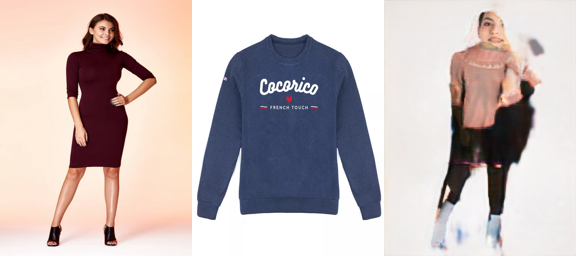

In [ ]:
output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_0.png')),
                np.array(Image.open('Data_preprocessing/test_color/000001_1.png')),
                np.array(Image.open('results/test/try-on/000001_0.png'))], axis=1)

image_grid = Image.fromarray(output_grid)
image_grid

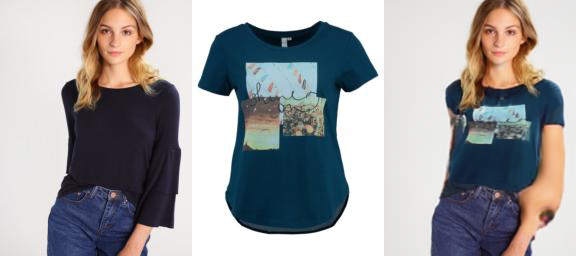

In [ ]:
output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000010_0.jpg')),
                np.array(Image.open('/content/ACGPN/Data_preprocessing/test_color/004325_1.jpg')),
                np.array(Image.open('results/test/try-on/000010_0.png'))], axis=1)

image_grid = Image.fromarray(output_grid)
image_grid

## G. Yildirim (2020) *GAN Applications in Generative Search and Outfit Rendering,* NeurIPS 2020, [[crosslink]](https://)


**Abstract/Analysis :** *The paper presents multiple pipelines considered by Zalando in order to improve customer Virtual-Try-On experiences by matching a desired cloth/product to the exact one stored in a database or to retrieve the most similar one(s). Additionally, text to image retrieval pipelines are considered as well as style mixing applications if the customer desires different types/colors/textures of the same cloth. Then the artificially generated image is matched to the most similar ones of a database. 
In addition, try-on for multiple clothes pipeline (shoes, jacket and pants at the same time)is considered. Indeed, Zalando can take a picture for each combination of t-shirt + pant + shoes available in its library (1 billion estimated) and even more so if different poses are needed (100 billions photographs estimated) which represent a huge number of possible combination. 
Consequently, GANs are considered in order to automatically do the job. Exemples are presented through a web-app aand the authors demonstrate the hability of GAN based models to perform accurate multi-clothes with different GAN generated proposals on multi-poses style transfer operations.*

## K. Li et al (2021) *Toward Accurate and Realistic Outfits Visualization with Attention to Details,* CVPR 2021, [[crosslink]](https://openaccess.thecvf.com/content/CVPR2021/papers/Li_Toward_Accurate_and_Realistic_Outfits_Visualization_With_Attention_to_Details_CVPR_2021_paper.pdf)

**Abstract**

*Virtual try-on methods aim to generate images of fashion models wearing arbitrary combinations of garments.
This is a challenging task because the generated image must
appear realistic and accurately display the interaction between garments. Prior works produce images that are filled
with artifacts and fail to capture important visual details
necessary for commercial applications. We propose Outfit
Visualization Net (OVNet) to capture these important details (e.g. buttons, shading, textures, realistic hemlines, and interactions between garments) and produce high quality multiple-garment virtual try-on images. OVNet consists of 1) a semantic layout generator and 2) an image generation pipeline using multiple coordinated warps. **We train the warper to output multiple warps using a cascade loss, which refines each successive warp to focus on poorly generated regions of a previous warp and yields consistent improvements in detail**. In addition, we introduce a method
for matching outfits with the most suitable model and produce significant improvements for both our and other previous try-on methods. Through quantitative and qualitative analysis, we demonstrate our method generates substantially higher-quality studio images compared to prior works for multi-garment outfits. An interactive interface powered by this method has been deployed on fashion e-commerce websites and received overwhelmingly positive feedback.*